# Clusterização com o K-Means

## Implementação Simplificada

In [45]:
from sklearn.datasets import load_iris
data = load_iris()
# Seleção das últimas coluna do dataset (última feature)
X = data.data[:,2:4]
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

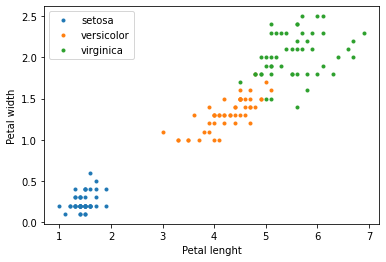

In [46]:
import matplotlib.pyplot as plt

for i in range(len(set(y))):
    plt.plot(X[y==i, 0], X[y==i, 1], "." ,label=data.target_names[i])
plt.xlabel("Petal lenght")
plt.ylabel("Petal width")
plt.legend()
plt.show()

No handles with labels found to put in legend.


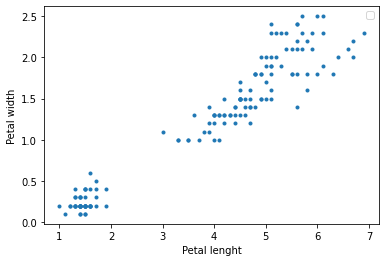

In [47]:
# Dados sem labels
plt.scatter(X[:,0], X[:, 1], marker=".")
plt.xlabel("Petal lenght")
plt.ylabel("Petal width")
plt.legend()
plt.show()


No handles with labels found to put in legend.


[[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]


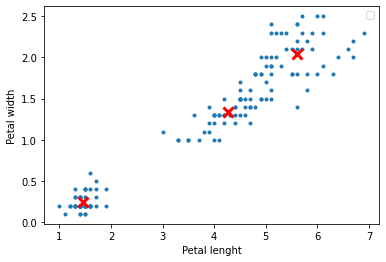

In [48]:
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin
import numpy as np
import random
# Cria classe do cluster Kmeans
class KMeans(BaseEstimator, ClusterMixin, TransformerMixin):
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters

    def _init_centroids(self, X):
        min = np.min(X, axis=0)
        max = np.max(X, axis=0)
        centroids = []
        for i in range(self.n_clusters):
            centroid = []
            for j in range(X.shape[1]):
                centroid.append(random.uniform(min[j], max[j]))
            centroids.append(centroid)
        self.cluster_centers_ = np.array(centroids)

    def fit(self, X, y=None):
        self._init_centroids(X)
        previous_centroids = self.cluster_centers_.copy()
        while True:
            ypred = self.predict(X)
            for i in range(self.n_clusters):
                if np.any(ypred==i):
                    self.cluster_centers_[i] = np.mean(X[ypred==i], axis=0)
            if np.allclose(previous_centroids, self.cluster_centers_, atol=0.0001):
                break
            previous_centroids = self.cluster_centers_.copy()

    def _distancias(self, X):
        diferenca = self.cluster_centers_ - X
        quadrado = diferenca ** 2
        soma = np.sum(quadrado, axis=1)
        raiz = np.sqrt(soma)
        return raiz

    def predict(self, X):
        ypred = np.empty((X.shape[0],))
        for i in range(X.shape[0]):
            distancias = self._distancias(X[i])
            centroid = np.argmin(distancias)
            ypred[i] = centroid
        return ypred


kmeans = KMeans()
kmeans.fit(X)
print(kmeans.cluster_centers_)

plt.scatter(X[:,0], X[:,1], marker=".")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="x", color="r", s=100, linewidths=3)
plt.xlabel("Petal lenght")
plt.ylabel("Petal width")
plt.legend()
plt.show()


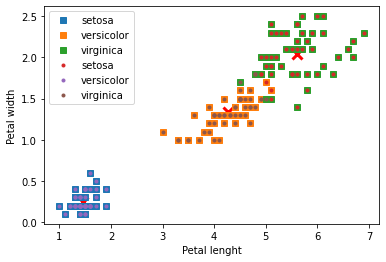

In [49]:
for i in range(len(set(y))):
    plt.plot(X[y==i, 0], X[y==i, 1], "s" ,label=data.target_names[i])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="x", color="r", s=100, linewidths=3)
ypred = kmeans.predict(X)
for i in range(len(set(ypred))):
    plt.plot(X[ypred==i, 0], X[ypred==i, 1], "." ,label=data.target_names[i])
plt.xlabel("Petal lenght")
plt.ylabel("Petal width")
plt.legend()
plt.show()

## Implementação com o Sklearn

In [50]:
from sklearn.cluster import KMeans

model = KMeans(
     init="random",
     n_clusters=3,
     max_iter=300,
     random_state=24
)

model.fit(X)

KMeans(init='random', n_clusters=3, random_state=24)

In [51]:
# Localização dos clusters
model.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [52]:
# Número de iterações necessárias para o modelo convergir
model.n_iter_

8

In [53]:
 # Rótulos obtidos
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

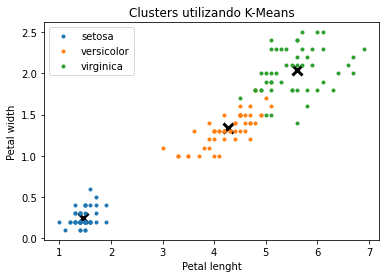

In [60]:
# Plota centróides dos clusters
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 
            marker="x", color="black", s=100, linewidths=3)
# Plota clusters          
for i in range(len(set(y))):
    plt.plot(X[y==i, 0], X[y==i, 1], "." ,label=data.target_names[i])

ypred = model.predict(X)

plt.title("Clusters utilizando K-Means")
plt.xlabel("Petal lenght")
plt.ylabel("Petal width")
plt.legend()
plt.show()

In [55]:
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])